## Principal Component Analysis
* What is PCA
* Dimensionality reduction
* Vizualization
* Noise Filterin
* Choosing Components

PCA (Principal Component Analysis), çok boyutlu bir veri kümesini daha az boyutlu bir uzaya dönüştürerek, verinin temel varyasyonlarını koruyan ve daha kolay yorumlanmasını sağlayan bir istatistiksel yöntemdir.

In [27]:
import numpy as np
rng = np.random.RandomState(1)
X=np.dot(rng.rand(2,2),rng.randn(2,200)).T

In [28]:
X.shape

(200, 2)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

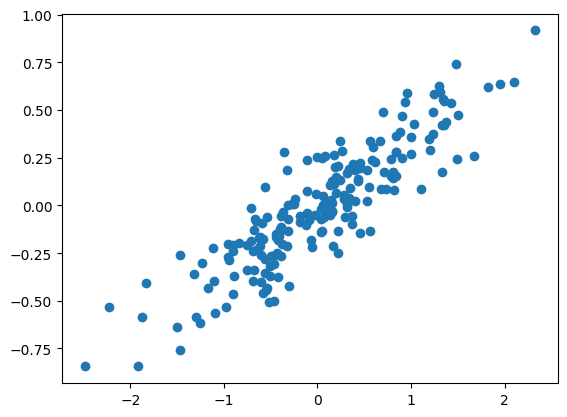

In [30]:
plt.scatter(X[:,0],X[:,1])

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [32]:
print(pca.components_)
print(pca.explained_variance_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


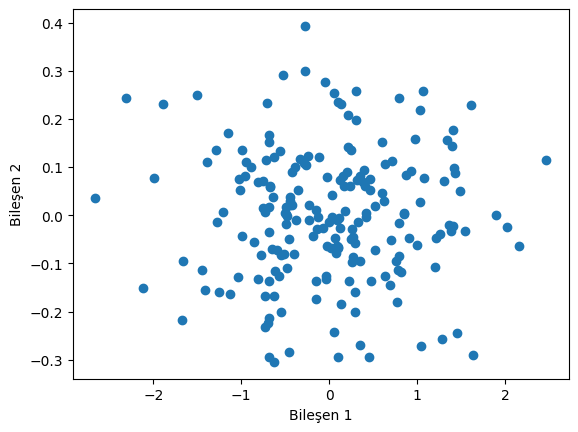

In [33]:
x_reduced = pca.fit_transform(X)
plt.scatter(x_reduced[:,0],x_reduced[:,1])
plt.xlabel('Bileşen 1')
plt.ylabel('Bileşen 2')
plt.show()

## Dimension Reduce

In [34]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.fit_transform(X) # Dimension Reduce
print(X.shape)
print(X_pca.shape)

(200, 2)
(200, 1)


Grafik üzerinde gösterimi. Turuncu Renkteki çizgi boyutu azaltılmış veridir. Turuncu çizgiler verideki varyansın en yüksek olan değerlerine yakın verileri ele alır ve verinin kovaryans yönüne doğru projekte eder.

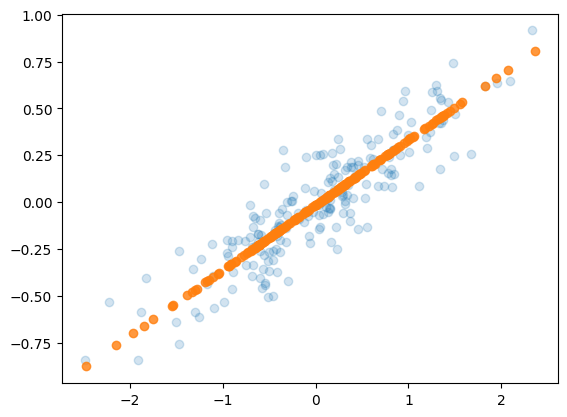

In [35]:
x_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0],X[:,1],alpha=0.2)
plt.scatter(x_new[:,0],x_new[:,1],alpha=0.8)

In [36]:
from sklearn.datasets import load_digits
data = load_digits()
data.data.shape

(1797, 64)

In [37]:
pca = PCA(2)
data_pca = pca.fit_transform(data.data)
data_pca.shape

(1797, 2)

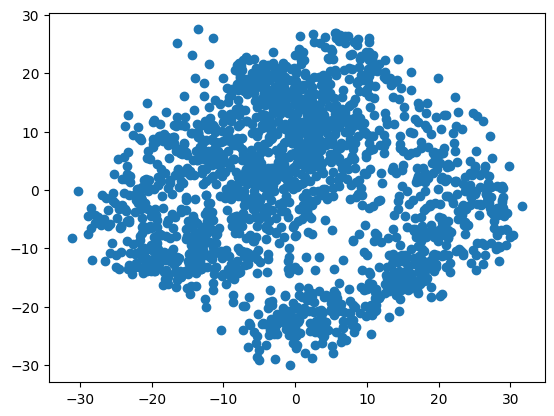

In [38]:
plt.scatter(data_pca[:,0],data_pca[:,1])

## Choosing the numer of Components
- Açıklanan varyansı grafikleştirelim.
- Aşşağıda grafik (bileşen-varyans) grafiğidir. Mesela 10 bileşenin varyansın %80i açıklıyor. 50 bileşen %98.

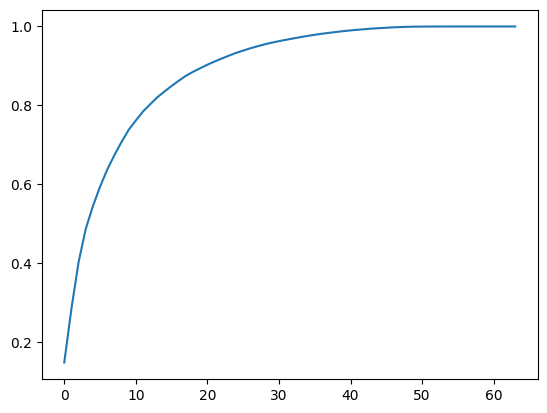

In [40]:
pca = PCA().fit(data.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))